In [39]:
import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
    host="212.227.90.6",
    database="Equip_14",
    user="Equipo14",
    password="E1q2u3i4p5o14"
)

cursor = mydb.cursor()
cursor.execute("SELECT * FROM RRHH") 

resultados = cursor.fetchall()

columnas = [desc[0] for desc in cursor.description]
df_rrhh = pd.DataFrame(resultados, columns=columnas)

df_rrhh 
df_rrhh.info()
df_rrhh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       740 non-null    int64 
 1   Reason_absence           740 non-null    int64 
 2   Month_absence            740 non-null    int64 
 3   Day_week                 740 non-null    int64 
 4   Seasons                  740 non-null    int64 
 5   Transportation_expense   740 non-null    int64 
 6   Distance_Residence_Work  740 non-null    int64 
 7   Service_time             740 non-null    int64 
 8   Age                      740 non-null    int64 
 9   Work_load_Average_day    740 non-null    object
 10  Hit_target               740 non-null    int64 
 11  Disciplinary_failure     740 non-null    object
 12  Education                740 non-null    object
 13  Son                      740 non-null    object
 14  Social_drinker           740 non-null    o

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112


In [40]:
df_rrhh.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Hit_target,Weight,Height,Body_mass_index,Absenteeism_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,108.000000,196.000000,38.000000,120.000000


In [44]:
df_rrhh_abs = df_rrhh[['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons', 
           'Work_load_Average_day', 'Hit_target', 'Absenteeism_hours']]
df_rrhh_abs = df_rrhh_abs.sort_values(by='ID').reset_index(drop=True)
df_rrhh_abs.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Hit_target,Absenteeism_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,94.587838,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,3.779313,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,81.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,93.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,95.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,97.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,100.000000,120.000000


In [47]:
df_rrhh_nodup = df_rrhh.drop_duplicates(subset="ID")
df_rrhh_nodup = df_rrhh_nodup.set_index("ID")
df_rrhh_nodup = df_rrhh_nodup.sort_index()

columns_to_keep = [
    "Transportation_expense", "Distance_Residence_Work",
    "Service_time", "Age", "Disciplinary_failure", "Education", "Son",
    "Social_drinker", "Social_smoker", "Pet", "Weight", "Height", "Body_mass_index"
]

df_rrhh_nodup = df_rrhh_nodup[columns_to_keep]
df_rrhh_nodup.describe()

,Transportation_expense,Distance_Residence_Work,Service_time,Age,Weight,Height,Body_mass_index
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,237.277778,27.194444,12.388889,38.333333,78.944444,173.055556,26.416667
std,73.982087,14.520566,5.309171,7.917431,13.591898,6.328820,4.698784
min,118.000000,5.000000,1.000000,27.000000,56.000000,163.000000,19.000000
25%,179.000000,15.000000,9.000000,32.000000,68.000000,169.000000,23.000000
50%,235.000000,25.500000,13.000000,37.500000,76.500000,172.000000,25.000000
75%,289.000000,37.500000,14.000000,43.000000,88.250000,175.750000,29.250000
max,388.000000,52.000000,29.000000,58.000000,108.000000,196.000000,38.000000


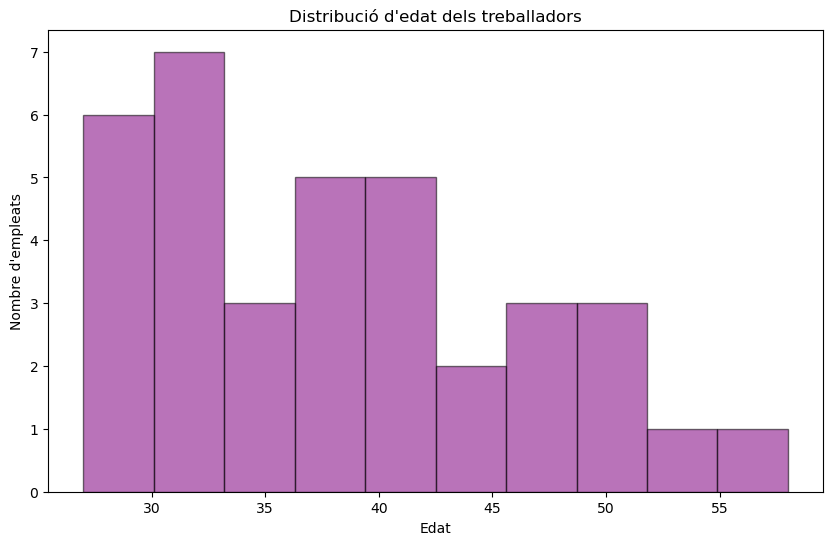

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.hist(df_rrhh_nodup['Age'], bins=10, edgecolor="black", color='purple', alpha=0.55)

plt.title("Distribució d'edat dels treballadors")
plt.xlabel("Edat")
plt.ylabel("Nombre d'empleats")

plt.show()

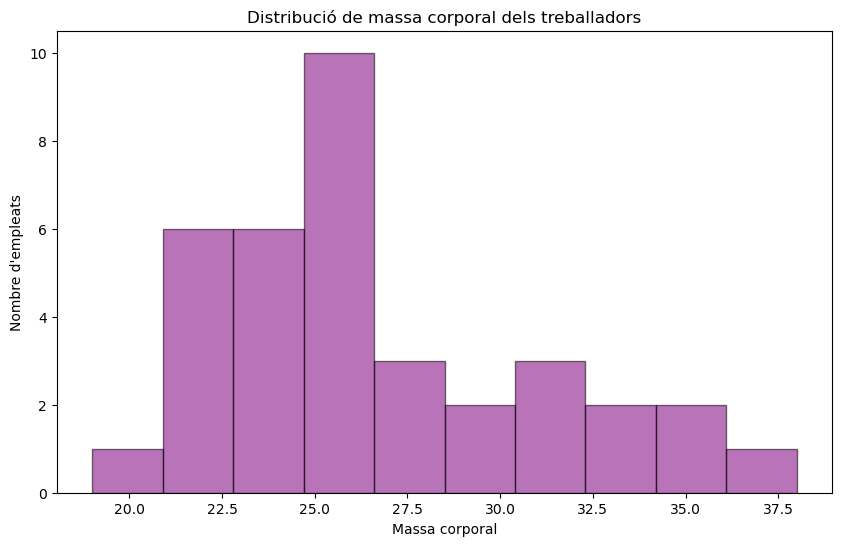

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.hist(df_rrhh_nodup['Body_mass_index'], bins=10, edgecolor="black", color='purple', alpha=0.55)

plt.title("Distribució de massa corporal dels treballadors")
plt.xlabel("Massa corporal")
plt.ylabel("Nombre d'empleats")

plt.show()

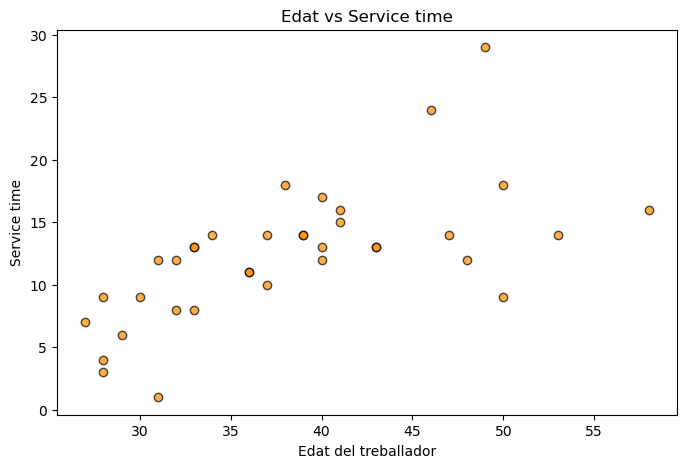

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))

plt.scatter(df_rrhh_nodup["Age"], df_rrhh_nodup["Service_time"], alpha=0.7, color='darkorange', edgecolor='black')
plt.title("Edat vs Service time")
plt.xlabel("Edat del treballador")
plt.ylabel("Service time")

plt.show()

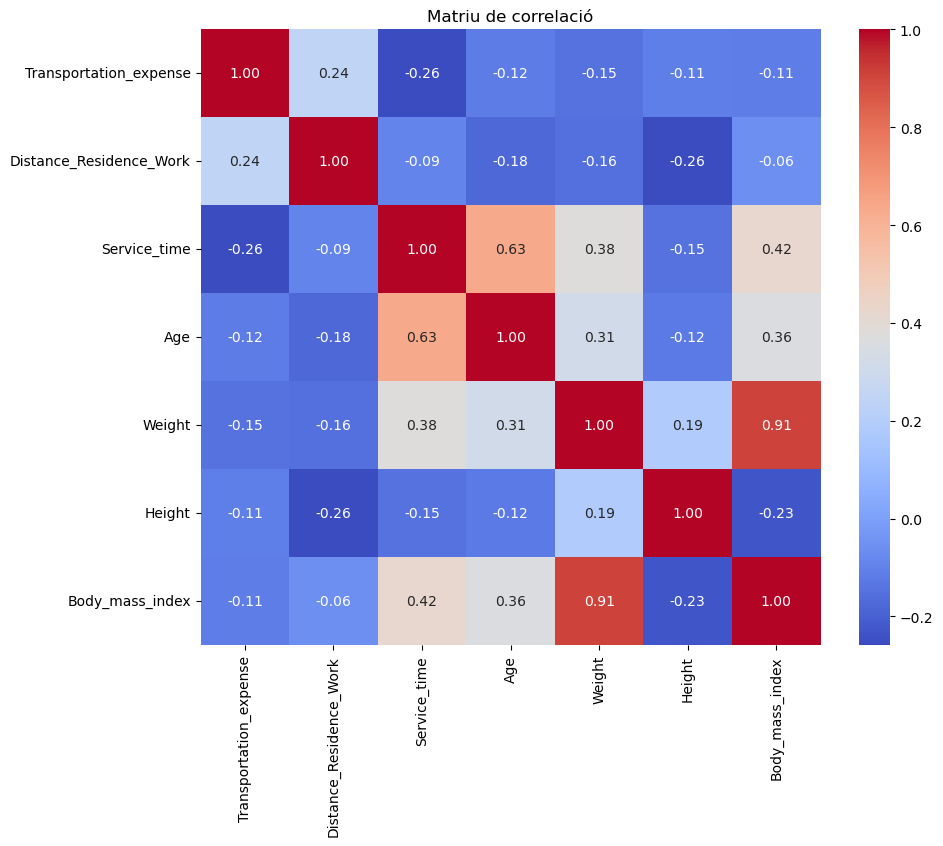

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_rrhh_nodup.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriu de correlació")
plt.show()

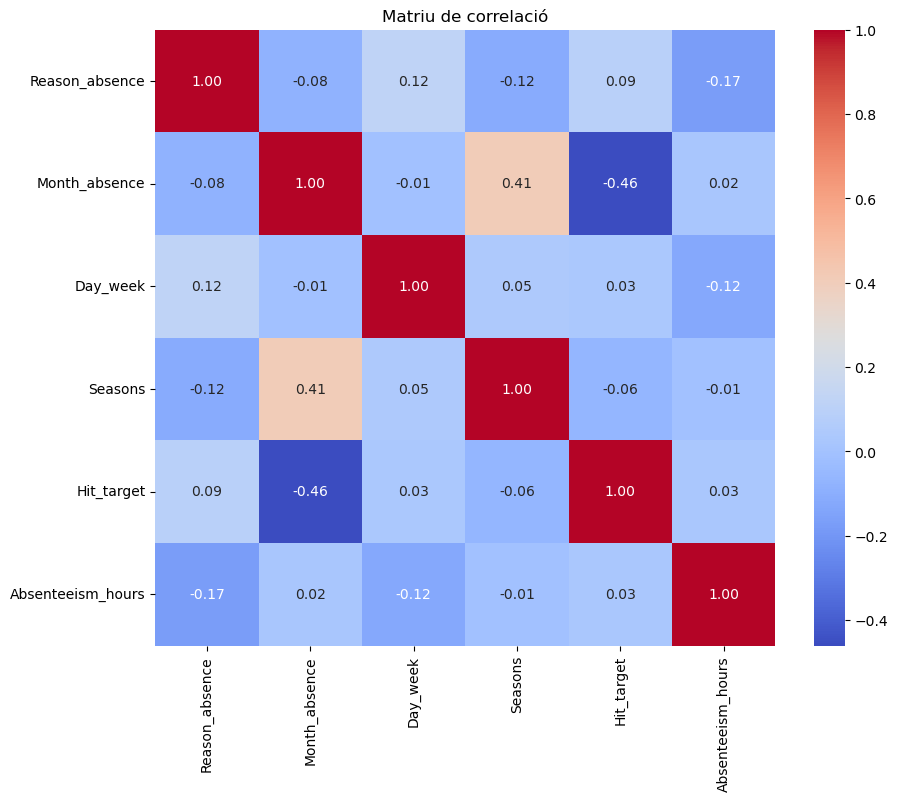

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_rrhh_abs.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriu de correlació")
plt.show()

/var/folders/fk/mbrh9_315c5gxjm9fcx4_tbm0000gn/T/ipykernel_57099/2623458388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance_Residence_Work", y="Transportation_expense", data=df_rrhh_nodup, palette="pastel")


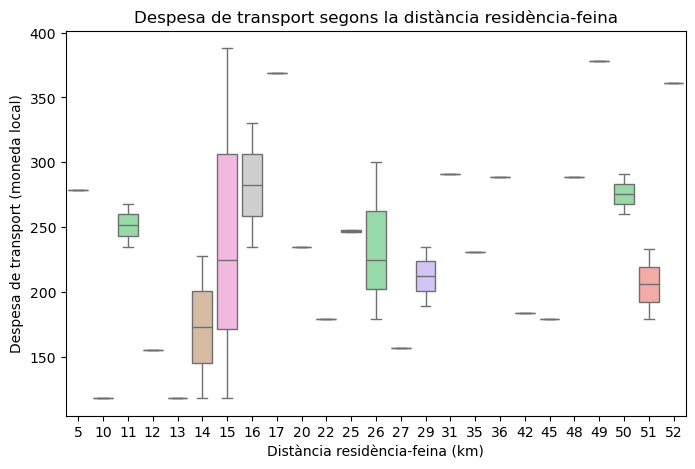

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Distance_Residence_Work", y="Transportation_expense", data=df_rrhh_nodup, palette="pastel")

plt.title("Despesa de transport segons la distància residència-feina")
plt.xlabel("Distància residència-feina (km)")
plt.ylabel("Despesa de transport (moneda local)")

plt.show()